In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from net import GeneratorUNet
from dataset import FabricDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda'
model_gen = GeneratorUNet().to(device)

In [3]:
weights = torch.load(r"/workspace/texture/pix2pix/models/weights_gen_e90.pt")
model_gen.load_state_dict(weights)

<All keys matched successfully>

In [4]:
image_size = 512
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize((image_size,image_size))
    ])

In [5]:
data_path = r"/mnt/storage/dataset/Pascal/pix2pix_test"
test_dataset = FabricDataset(data_path, transform=transform)

In [6]:
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [10]:
model_gen.eval()

with torch.no_grad():
    for a, b in test_dataloader:
        fake_imgs = model_gen(a.to(device)).squeeze(0).detach().cpu().permute(1, 2, 0)
        real_imgs = b.squeeze(0).permute(1, 2, 0)
        # break

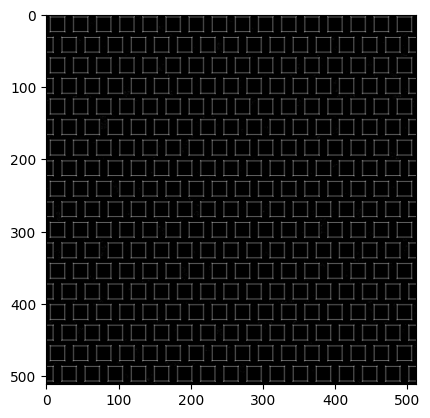

In [11]:
plt.imshow(real_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


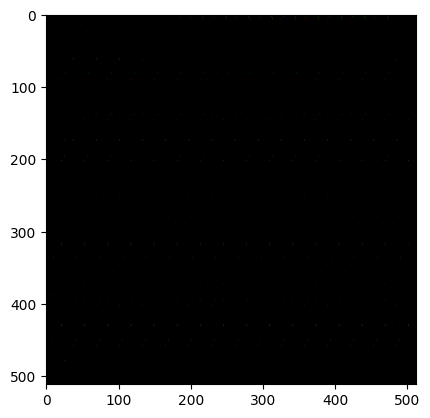

In [12]:
plt.imshow(fake_imgs)